In [ ]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))  # input 10000 text seqeunces, output 32
model.add(SimpleRNN(32))  # timestep, 32 comes here, output another 32
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True)) # return_sequences = True, return timesteps from all the data
model.add(SimpleRNN(32))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Imdb data
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense

max_features = 10000
maxlen = 500
batch_size = 32

(X_train,y_train),(X_test, y_test) = imdb.load_data(num_words = max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')
X_train = sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# model = Sequential()
# model.add(Embedding(max_features, 32)) # convert texts to vectors
# model.add(SimpleRNN(32))  # RNN layer, remebers 32 words, which allows the model to predict text.
# model.add(Dense(1, activation = 'sigmoid')) # predicts sequences
# model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
# history = model.fit(X_train, y_train, epochs = 2, batch_size = 128, validation_split = 0.2)


17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
X_train shape: (25000, 500)
X_test shape: (25000, 500)


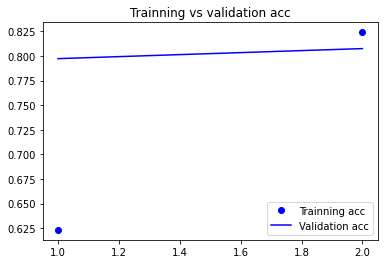

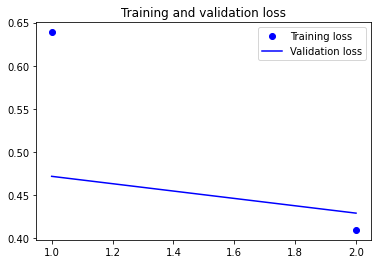

In [ ]:
# plotting RNN 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Trainning acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Trainning vs validation acc') # good way to check for overfitting, indicated by differences in training and validation acc.
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()







In [ ]:
from keras.layers import LSTM
# LSTM
model = Sequential()
model.add(Embedding(max_features, 32))  # output 32 words, convert words to vectors. RNN is good with small data
model.add(LSTM(32)) # prevent information loss midway, reinsert information at a later time
model.add(Dense(1, activation = 'sigmoid')) # good for binary class
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs = 2, batch_size = 128, validation_split = 0.2)



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 66s 3ms/step - loss: 0.5059 - acc: 0.7608 - val_loss: 0.3561 - val_acc: 0.8632
Epoch 2/2
20000/20000 [==============================] - 67s 3ms/step - loss: 0.2914 - acc: 0.8858 - val_loss: 0.3813 - val_acc: 0.8438


In [7]:
import os
data_dir = 'jena_climate_2009_2016.csv'
f = open(data_dir)
data = f.read()  # read the data
f.close()  # close the file
lines = data.split('\n')  # split the data
header = lines[0].split(',') # first line is header
lines = lines[1:]  # rest are the actual data, row 1 to rest
print(header)
print(len(lines))


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


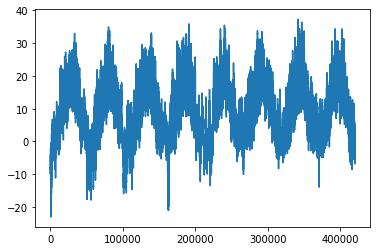

In [11]:
# convert data into array

import numpy as np
from matplotlib import pyplot as plt


float_data = np.zeros((len(lines), len(header) - 1)) # zeros row and column
for i, line in enumerate(lines): # loop through lines
  values = [float(x) for x in line.split(',')[1:]] # loop through line split and convert x to float
  float_data[i, :] = values # initiate row i and all the column as values

# plotting the temperature
temp = float_data[:, 1]  # all the rows and column one gives temp
plt.plot(range(len(temp)), temp)


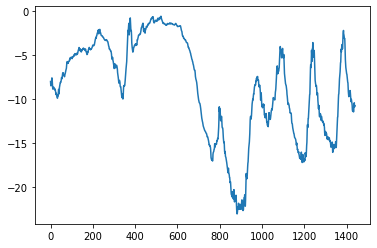

In [12]:
plt.plot(range(1440), temp[:1440]) # 10 days of temp time series, negative temp suggests winter
